<a href="https://colab.research.google.com/github/vanessaNjoroge2/AI_Practical-Assignment/blob/main/Unsupervised_Learning_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [2]:
# Load Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Optional: Add target for reference (not used for clustering)
df['species'] = iris.target

# Preview the dataset
df.head()

# Basic info and statistics
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000        

In [3]:
# Standardize features for better clustering
X = df.drop('species', axis=1)  # Only features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


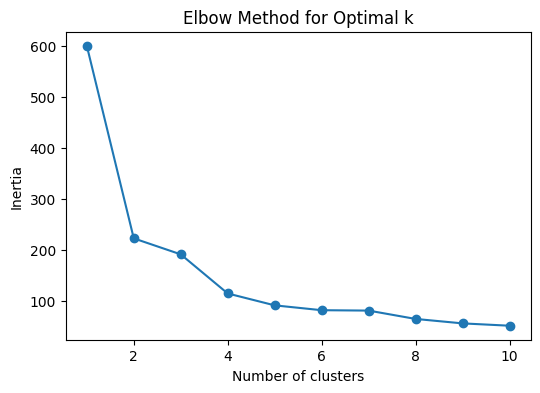

In [5]:
#K Means Clustering
# Determine optimal number of clusters using Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow graph
plt.figure(figsize=(6,4))
plt.plot(range(1,11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Fit K-Means with 3 clusters (optimal for Iris)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to dataframe
df['cluster'] = clusters


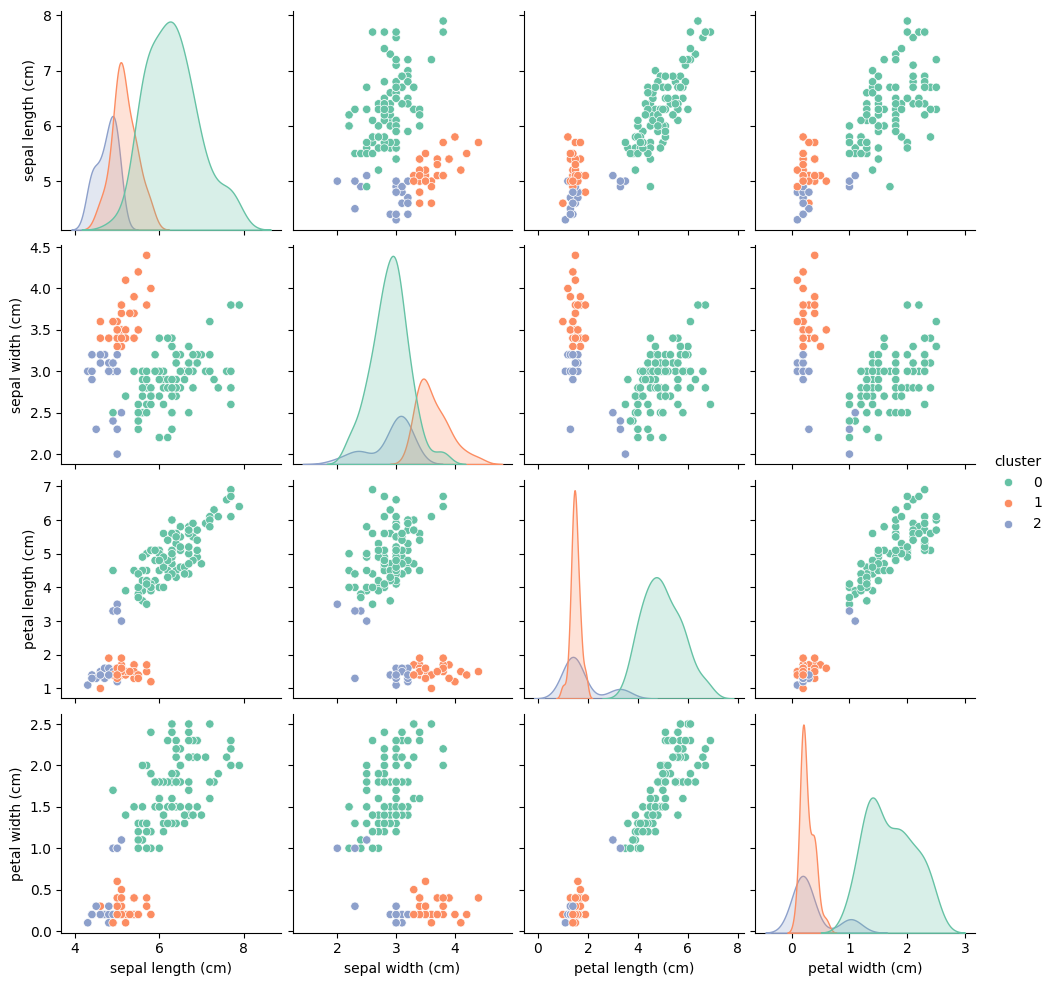

In [6]:
# Pairplot colored by cluster
sns.pairplot(df, hue='cluster', palette='Set2', vars=iris.feature_names)
plt.show()


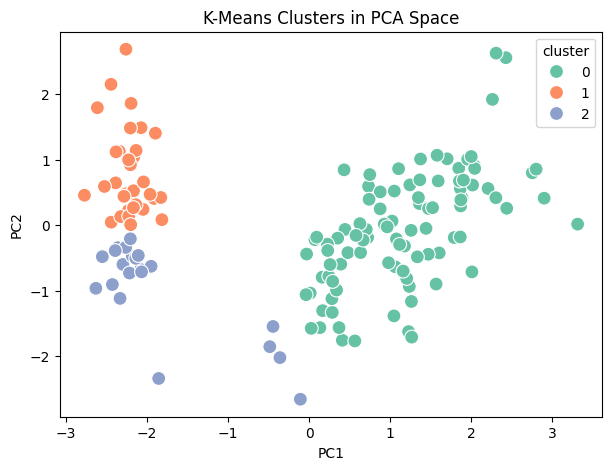

In [7]:
#Dimensionality Reduction with PCA
# Reduce to 2 principal components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with PCA results
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['cluster'] = clusters

# Plot clusters in PCA space
plt.figure(figsize=(7,5))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=df_pca, palette='Set2', s=100)
plt.title('K-Means Clusters in PCA Space')
plt.show()


In [8]:
# Optional: Silhouette score for cluster quality
score = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score: {score:.2f}")


Silhouette Score: 0.48
